# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
pyber_data_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [5]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby(['type']).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers=city_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
average_fare=total_fares/total_rides
average_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
fare_per_driver=total_fares/total_drivers
fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
DF_summary=pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare,
    "Average Fare per Driver": fare_per_driver})
DF_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
DF_summary.index.name = None
DF_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.
DF_summary["Total Rides"] = DF_summary["Total Rides"].map("{:,}".format)
DF_summary["Total Drivers"] = DF_summary["Total Drivers"].map("{:,}".format)
DF_summary["Total Fares"] = DF_summary["Total Fares"].map("${:,.2f}".format)
DF_summary["Average Fare per Ride"] = DF_summary["Average Fare per Ride"].map("${:.2f}".format)
DF_summary["Average Fare per Driver"] = DF_summary["Average Fare per Driver"].map("${:.2f}".format)
# Display the data frame
DF_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [14]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

DF_fare_sums = pyber_data_df.groupby(["type", "date"])[["fare"]].sum()
pd.set_option("display.max_rows", None)
DF_fare_sums

fare
type     date                  
Rural    1/1/2019 9:45    43.69
         1/11/2019 4:39   16.42
         1/14/2019 15:58  54.10
         1/14/2019 7:09   18.05
         1/15/2019 21:44  30.26
         1/18/2019 0:46   15.12
         1/18/2019 7:36   43.57
         1/19/2019 11:40  49.44
         1/19/2019 12:38  38.68
         1/19/2019 20:21  56.78
         1/2/2019 11:18   52.12
         1/22/2019 12:42  13.50
         1/22/2019 15:36  10.11
         1/23/2019 6:52   40.24
         1/24/2019 13:32  34.74
         1/27/2019 17:33  42.68
         1/27/2019 18:43  38.42
         1/28/2019 15:55  31.25
         1/3/2019 19:51   19.90
         1/30/2019 0:05   20.76
         1/30/2019 10:55  51.39
         1/30/2019 1:40   37.05
         1/31/2019 17:57  58.29
         1/4/2019 3:31    24.88
         1/6/2019 7:38    47.33
         1/8/2019 6:19    19.39
         1/9/2019 15:30   31.84
         2/1/2019 8:59    17.05
         2/10/2019 21:03  11.11
         2/11/2019 5:42   25.78
         2/16/2019 17:02  39.46
         2/17/2019 4:42   30.58
         2/18/2019 18:27  36.16
         2/18/2019 22:21  34.32
         2/19/2019 0:23   32.72
         2/19/2019 3:52   58.55
         2/2/2019 14:54   12.42
         2/2/2019 6:28    53.07
         2/20/2019 16:32  44.29
         2/21/2019 19:16  55.40
         2/22/2019 1:46   33.38
         2/22/2019 9:01   17.40
         2/23/2019 12:00  37.05
         2/23/2019 21:12  47.90
         2/24/2019 0:44   21.89
         2/25/2019 19:06  54.66
         2/25/2019 23:46  28.65
         2/25/2019 4:10   16.18
         2/26/2019 7:03   54.66
         2/3/2019 17:15   51.80
         2/4/2019 16:29   13.97
         2/4/2019 23:54   45.70
         2/5/2019 22:53   45.02
         3/10/2019 10:05  56.48
         3/10/2019 10:11  19.02
         3/11/2019 0:51   49.82
         3/12/2019 13:05  23.21
         3/12/2019 4:22   26.55
         3/13/2019 14:40  37.72
         3/13/2019 6:41   26.09
         3/18/2019 10:38  40.34
         3/18/2019 16:59  33.72
         3/2/2019 21:04   20.99
         3/22/2019 22:20  38.30
         3/24/2019 18:53  57.51
         3/24/2019 7:34   19.89
         3/25/2019 13:36  10.37
         3/27/2019 12:07  34.42
         3/27/2019 18:27  54.85
         3/27/2019 21:07  11.87
         3/27/2019 21:48  38.62
         3/28/2019 0:12   35.45
         3/29/2019 9:11   13.84
         3/5/2019 21:19   38.18
         3/5/2019 4:46    29.45
         3/6/2019 20:06   48.11
         3/6/2019 21:44   19.74
         3/6/2019 9:09    44.17
         3/7/2019 19:10   48.79
         4/1/2019 13:39   26.73
         4/1/2019 16:37   54.65
         4/1/2019 9:32    21.63
         4/10/2019 20:46  43.25
         4/10/2019 9:47   19.07
         4/12/2019 18:11  57.23
         4/13/2019 11:13  43.22
         4/13/2019 16:08  39.89
         4/14/2019 7:06   11.94
         4/16/2019 16:30  17.39
         4/16/2019 21:12  24.10
         4/17/2019 1:48   17.31
         4/18/2019 19:26  30.94
         4/18/2019 19:33  46.60
         4/18/2019 19:43  42.97
         4/19/2019 4:32   16.29
         4/2/2019 10:26   14.11
         4/2/2019 21:00   13.46
         4/2/2019 9:17    47.07
         4/21/2019 21:14  18.54
         4/22/2019 16:56  38.46
         4/22/2019 17:28  19.27
         4/23/2019 12:21  25.94
         4/25/2019 10:20  55.84
         4/27/2019 17:58  14.01
         4/27/2019 6:02   38.33
         4/29/2019 17:04  13.38
         4/29/2019 1:58   54.22
         4/3/2019 5:41    38.92
         4/30/2019 1:50   50.81
         4/30/2019 21:26  37.33
         4/4/2019 13:13   51.83
         4/4/2019 1:58    43.86
         4/5/2019 14:35   32.20
         4/5/2019 21:38   50.98
         4/6/2019 1:01    45.31
         4/7/2019 21:12   49.70
         4/7/2019 23:42   10.79
         4/8/2019 13:46   55.19
         5/1/2019 8:14    22.44
         5/2/2019 11:57   52.71
         5/5/2019 19:29   26.53
         5/6/2019 0:58    41.18
         5/6/2019 16:57   18.90
         5/6/2019 8:57    5

In [15]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

DF_fare_sums = DF_fare_sums.reset_index()
DF_fare_sums.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [16]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

DF_fare_sums=DF_fare_sums.pivot(index = "date", columns = "type", values = "fare")
DF_fare_sums

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [17]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
DF_jan_apr=DF_fare_sums.loc["1/1/2019":"4/29/2019"]
DF_jan_apr

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [18]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
DF_jan_apr.index = pd.to_datetime(DF_jan_apr.index)

In [19]:
# 6. Check that the datatype for the index is datetime using df.info()
DF_jan_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [22]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
DF_jan_apr_weekly=DF_jan_apr.resample("W").sum()
DF_jan_apr_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


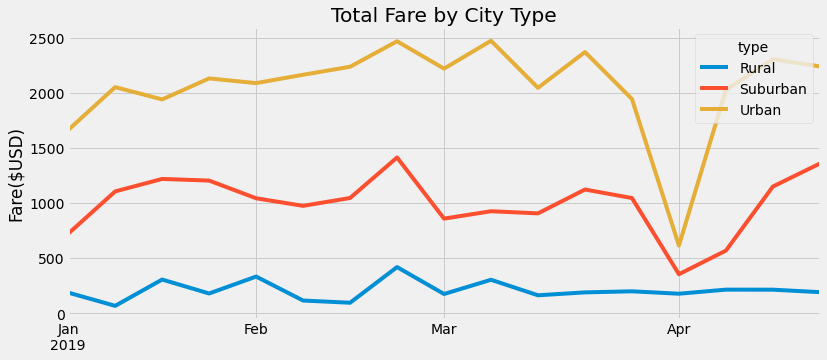

In [32]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
DF_jan_apr_weekly.plot(kind="line",
                   title="Total Fare by City Type",
                   xlabel="",   
                   ylabel="Fare($USD)",
                   figsize=(12, 5))

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Save the figure.
plt.savefig("resources/fares_graph.png")